In [4]:
import keras

F:\environment\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [158]:
from keras import layers
from keras.layers import Dense,Activation,Dropout
from keras.layers import LSTM,Bidirectional #could try TimeDistributed(Dense(...))
from keras.models import Sequential
from keras import optimizers,regularizers
from keras.layers.normalization import BatchNormalization
from sklearn import preprocessing
import numpy as np
import pandas as pd
import path,random
import matplotlib.pyplot as plt

In [195]:
root_data=r'E:\my_proj\fog_recognition\fog_optimization\dl4fog\data\SignalMarkNode'
INFO_COLS = ["time10","label_start_time","label_end_time","gait_type",
             "label_confidence","stimulate_type","start_time","end_time","unit_confidence"]

INFO_COLS=['time10', 'label_start_time', 'label_end_time', 'gait_type', 'label_confidence', 'stimulate_type', 
             'start_time', 'end_time', 'unit_confidence', 'status', 'status_code', 'one_hot']
f=r"E:\my_proj\fog_recognition\fog_optimization\dl4fog\data\SignalMarkNode\pd000002==20161223_1_2.csv"
df= pd.read_csv(open(f))#.drop(columns=["gait_type","label_confidence","time10","unit_confidence"])


status=['normal','fog']

data_dim=['A100_accelerometer_x','A100_accelerometer_y','A100_accelerometer_z','A100_gyroscope_x',
          'A100_gyroscope_y','A100_gyroscope_z','A200_accelerometer_x','A200_accelerometer_y','A200_accelerometer_z',
          'A200_gyroscope_x','A200_gyroscope_y','A200_gyroscope_z','A300_accelerometer_x','A300_accelerometer_y',
          'A300_accelerometer_z','A300_gyroscope_x','A300_gyroscope_y','A300_gyroscope_z']

data_dim = list(set(df.columns)-set(INFO_COLS))

ndim=len(data_dim)
timestep=800;
step=100;
num_classes=len(status)

In [164]:
x_seq=[]
y_seq=[]


for f in path.Path(root_data).listdir()[0:20]:
    df= pd.read_csv(open(f),usecols=data_dim+['status_code'])#.drop(columns=["gait_type","label_confidence","time10","unit_confidence"])
    
    data_seq=[]
    x=preprocessing.scale(df.iloc[:,:-1])
    y=np.stack(df['status_code'].apply(keras.utils.to_categorical,args=(2,)))
    print(y.sum(axis=1).min(),y.sum(axis=1).max())
    #y = one_hot_ed.transform(df.iloc[:,-1].values.reshape(-1,1)).toarray()
    idxs = [(start,start+timestep) for start in range(0,len(df)-timestep,step)]
    for start,end in idxs:
        #print(start,end,y[start:end].shape,f)
#         if any(sum(y[start:end])<1):
#             pass
#         else:
        data_seq.append((x[start:end,:].tolist(),y[start:end].tolist()))
    random.shuffle(data_seq)
    x_seq_f=[tp[0] for tp in data_seq]
    y_seq_f=[tp[1] for tp in data_seq] 
    x_seq.extend(x_seq_f)
    y_seq.extend(y_seq_f)
x_data=np.array(x_seq)
y_data=np.array(y_seq)
    
#seqs=prepare_seq(timestep,step,df)
#x_data=np.dstack(x_seq).reshape(-1,timestep,ndim)
#y_data=np.dstack(y_seq).reshape(-1,timestep,num_classes)

F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0
1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


1.0 1.0
1.0 1.0


F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


In [168]:
x_data.shape,y_data.shape

((2353, 800, 42), (2353, 800, 2))

In [51]:
for y in y_val:
    print(y.sum(axis=1).min(),y.sum(axis=1).max())

1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0
1.0 1.0


In [169]:
x_data.shape,y_data.shape,np.dstack(x_seq).shape,np.dstack(y_seq).shape

((2353, 800, 42), (2353, 800, 2), (800, 42, 2353), (800, 2, 2353))

In [170]:
x_train,x_val=x_data[0:int(0.7*x_data.shape[0])],x_data[int(0.7*x_data.shape[0]):]
y_train,y_val=y_data[0:int(0.7*x_data.shape[0])],y_data[int(0.7*x_data.shape[0]):]

In [172]:
model = Sequential()

model.add(layers.InputLayer(input_shape=(timestep,ndim)))
#model.add(Dense(100,W_regularizer=regularizers.l2(l=0.01), input_shape=(timestep,data_dim)))
#model.add(Bidirectional(LSTM(100, return_sequences=True)))#, input_shape=(seqlength, features)) ) ### bidirectional ---><---
model.add(Bidirectional(layers.GRU(50, return_sequences=True)))#, input_shape=(seqlength, features)) ) ### bidirectional ---><---
model.add(Bidirectional(layers.GRU(10, return_sequences=True)))#, input_shape=(seqlength, features)) ) ### bidirectional ---><---
model.add(Dropout(0.2))
model.add(BatchNormalization())
#model.add(Dense(150, activation='relu',W_regularizer=regularizers.l2(l=0.01)))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
#model.add(layers.TimeDistributed(Dense(num_classes, activation='softmax')))
model.add(Dense(num_classes, activation='softmax'))

#adam = optimizers.adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
optimizer=optimizers.RMSprop(lr=1e-2)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_5 (Bidirection (None, 800, 100)          27900     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 800, 20)           6660      
_________________________________________________________________
dropout_3 (Dropout)          (None, 800, 20)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 800, 20)           80        
_________________________________________________________________
dense_19 (Dense)             (None, 800, 2)            42        
Total params: 34,682
Trainable params: 34,642
Non-trainable params: 40
_________________________________________________________________
None


In [219]:
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(layers.InputLayer(input_shape=(timestep,ndim)))
model.add(layers.Conv1D(20,100,padding="SAME"))
#model.add(layers.Conv1D(20,20,padding="SAME"))
#model.add(layers.Conv1D(42,10,padding="SAME"))
model.add(layers.GRU(20, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(layers.GRU(10, return_sequences=True))  # returns a sequence of vectors of dimension 32
#model.add(layers.GRU(5, return_sequences=True))  # returns a sequence of vectors of dimension 32
#model.add(layers.GRU(20, return_sequences=True))  # returns a sequence of vectors of dimension 32
#model.add(layers.GRU(100, return_sequences=True))  # returns a sequence of vectors of dimension 32
#model.add(layers.LocallyConnected1D(30,10,padding='SAME'))
model.add(Dense(2, activation='softmax'))
optimizer=optimizers.RMSprop(lr=1e-2)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 800, 20)           84020     
_________________________________________________________________
gru_40 (GRU)                 (None, 800, 20)           2460      
_________________________________________________________________
gru_41 (GRU)                 (None, 800, 10)           930       
_________________________________________________________________
dense_34 (Dense)             (None, 800, 2)            22        
Total params: 87,432
Trainable params: 87,432
Non-trainable params: 0
_________________________________________________________________
None


In [220]:
model.fit(x_train, y_train,batch_size=20, epochs=500,validation_data=(x_val, y_val))

Train on 1647 samples, validate on 706 samples
Epoch 1/500
1647/1647 [==============================] - 50s 31ms/step - loss: 0.3965 - acc: 0.8221 - val_loss: 0.9052 - val_acc: 0.5687
Epoch 2/500
1647/1647 [==============================] - 46s 28ms/step - loss: 0.2755 - acc: 0.8909 - val_loss: 1.0519 - val_acc: 0.6068
Epoch 3/500
 200/1647 [==>...........................] - ETA: 35s - loss: 0.2573 - acc: 0.8992

KeyboardInterrupt: 

In [196]:
f=r"E:\my_proj\fog_recognition\fog_optimization\dl4fog\data\SignalMarkNode\pd000002==20161223_1_2.csv"
df= pd.read_csv(open(f),usecols=data_dim+['status_code'])#.drop(columns=["gait_type","label_confidence","time10","unit_confidence"])

data_seq=[]
x=preprocessing.scale(df.iloc[:,:-1])
y=np.stack(df['status_code'].apply(keras.utils.to_categorical,args=(2,)))
print(y.sum(axis=1).min(),y.sum(axis=1).max())
#y = one_hot_ed.transform(df.iloc[:,-1].values.reshape(-1,1)).toarray()
idxs = [(start,start+timestep) for start in range(0,len(df)-timestep,step)]
for start,end in idxs:
    data_seq.append((x[start:end,:].tolist(),y[start:end].tolist()))
random.shuffle(data_seq)
x_seq_f=[tp[0] for tp in data_seq]
y_seq_f=[tp[1] for tp in data_seq]
x_test=np.array(x_seq_f)
y_test=np.array(y_seq_f)

y_pred=model.predict_classes(x_test)
y_real=np.array([it.argmax(axis=1).tolist() for it in y_test])

F:\environment\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


1.0 1.0


In [197]:
pred=[]
for i in range(len(idxs)):
    idx=idxs[i]
    idx=range(idx[0],idx[1])
    ypred=y_pred[i].tolist()
    yreal=y_real[i].tolist()
    pred.extend(list(zip(idx,ypred,yreal)))

resulf_df=pd.DataFrame(pred,columns=['id','ypred','yreal'])

res_df2=resulf_df.sort_values('id')#.groupby('id').mean()
res_df3=resulf_df.sort_values('id').groupby('id').agg(lambda x: x.value_counts().index[0]).reset_index()

# for i in range(1000):
#     print(res_df2[res_df2['id']==i]['yreal'])

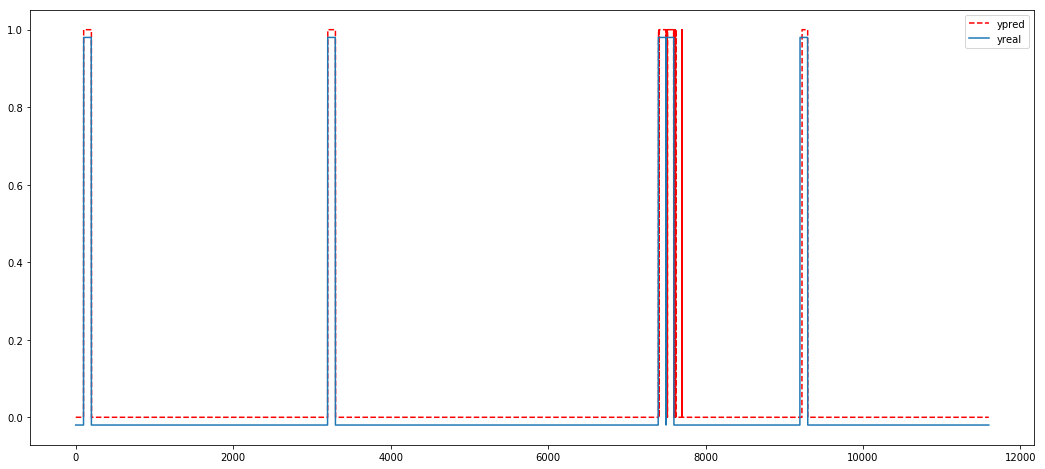

In [198]:
plt.figure(figsize=(18,8))
plt.plot(res_df3['ypred'],'r--')
plt.plot(res_df3['yreal']-0.02)
plt.legend()

In [242]:
from keras.layers import Input, Dense
from keras.models import Model

# 这部分返回一个张量

inputs = Input(shape=(10,))

# 层的实例是可调用的，它以张量为参数，并且返回一个张量
x = Dense(64, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [298]:
md=Sequential()
md.add(layers.InputLayer([2,2]))
li=layers.InputLayer([2,2])
md.add(keras.layers.Lambda(lambda x: x ** 2))

In [319]:
md.predict(np.array([[[3.4,2],[3,4]]]))
lb=keras.layers.Lambda(lambda x: x ** 2)
lb.call(12)

144

In [320]:
ds=Dense(10, activation='softmax')

In [283]:
md.add(keras.layers.Lambda(lambda x: x ** 2))
md.predict(np.array([[[1,2],[3,4]]]))

array([[[ 1.,  4.],
        [ 9., 16.]]], dtype=float32)

In [ ]:
a = Input(shape=(2,))
b = Input(shape=(2,))

m=keras.layers.Lambda(lambda x: x ** 2)(a)
md=keras.engine.Model(inputs=[a],outputs=[m])
md.predict(np.array([1,2]).reshape(1,2))

In [ ]:
# 这部分创建了一个包含输入层和三个全连接层的模型
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(data, labels)  # 开始训练

In [292]:
from keras import Input
from keras import backend as K
from keras.engine import Model
from keras.layers import Lambda

import numpy as np
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

a = Input(shape=(2,))
b = Input(shape=(2,))

def minus(inputs):
    x, y = inputs
    return K.mean(x - y, axis=1)
    # return K.mean(x - y)

m = Lambda(minus, name='minus')([a, b])
model = Model(inputs=[a, b], outputs=[m])

v0 = np.array([1,2])
v1 = np.array([3,4])
v2 = np.array([5,6])
print (model.predict([v0.reshape(1,2), v1.reshape(1,2)]))
print (model.predict([v0.reshape(1,2), v2.reshape(1,2)]))
print (model.predict([np.array([v0, v0]), np.array([v1, v2])]))


[-2.]
[-4.]
[-2. -4.]


In [330]:
print(np.shape(X))#(1920, 45, 20)
X=keras.preprocessing.sequence.pad_sequences(X, maxlen=100, padding='post')
print(np.shape(X))#(1920, 100, 20)

(1920, 45, 20)
(1920, 100, 20)


In [327]:
ar=np.arange(1920*45*20)

In [331]:
X0=ar.reshape(1920, 45, 20)

In [332]:
X0[0]

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
         33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119],
       [120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 138, 139],
       [140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
        153, 154, 155, 156, 157, 158, 159],
       [160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 1

In [334]:
X[0].shape

(100, 20)